## Machine Learning With Python: Linear Regression With One Variable


#### Sample problem of predicting home price in monroe, new jersey (USA)
Below table represents current home prices in monroe township based on square feet area, new jersey




![](homepricetable.JPG)

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area

You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart.

![](scatterplot.JPG)

You can draw multiple lines like this but we choose the one where total sum of error is minimum


![](different_lines.JPG)

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

![](linear_equation.png)

In [6]:
%pip install scikit-learn



  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 991.0 kB/s eta 0:00:11
    --------------------------------------- 0.2/10.6 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.5/10.6 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.6 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/10.6 MB 3.1 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/10.6 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/10.6 MB 3.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/10.6 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.6 MB 3.4 MB/s eta 0:00:03
   ------ ---------------------

In [9]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [10]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


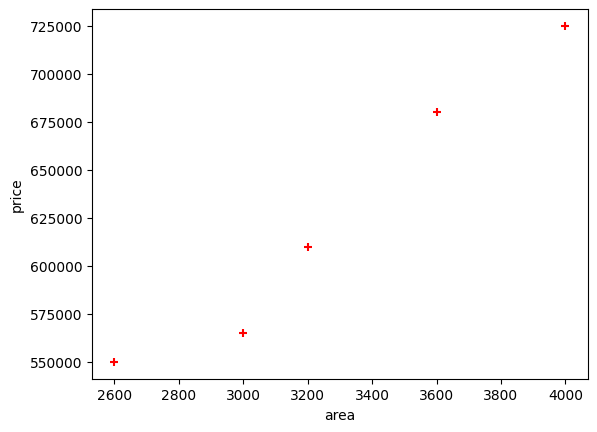

In [11]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [12]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [13]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [14]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [15]:
# (1) Predict price of a home with area = 3300 sqr ft
reg.predict([[3300]])

c:\Users\sajid.majeed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [16]:
reg.coef_

array([135.78767123])

In [17]:
reg.intercept_

180616.43835616432

In [18]:
# Y = m * X + b (m is coefficient and b is intercept)
3300*135.78767123 + 180616.43835616432


628715.7534151643

In [19]:
# Generate CSV file with list of home price predictions
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [20]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [21]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


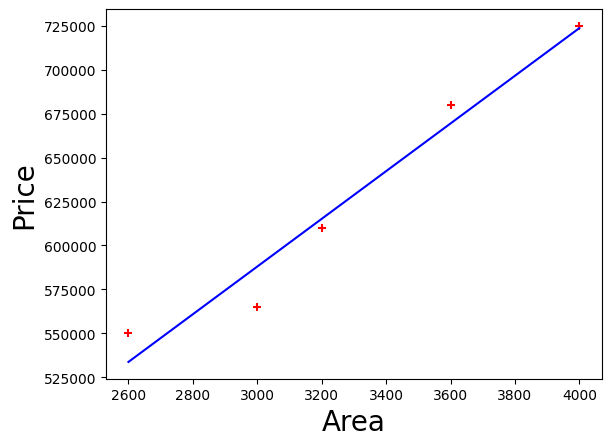

In [22]:
plt.xlabel('Area',fontsize =20)
plt.ylabel('Price',fontsize =20)
plt.scatter(df.area,df.price,color="red" ,marker="+")
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [23]:
area_df.to_csv("prediction.csv")